# Домашняя работа
### Тема: Случайные марковские процессы

Задание:  
 -Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов  
 -Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
!pip install pymorphy2
!pip install pymystem3
!pip install hmmlearn

In [2]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
from hmmlearn.hmm import GaussianHMM
import warnings
%matplotlib inline
sns.set()

In [3]:
just_text=''
with open('tom_2.txt', 'r') as f:
    just_text+=f.read().lower()

Оставляем только пробелы и буквы

In [4]:
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [5]:
text = words_only(just_text)

Лемматизируем текст

In [6]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [7]:
text_lemma=lemmatize(text)

Матрица переходных вероятностей

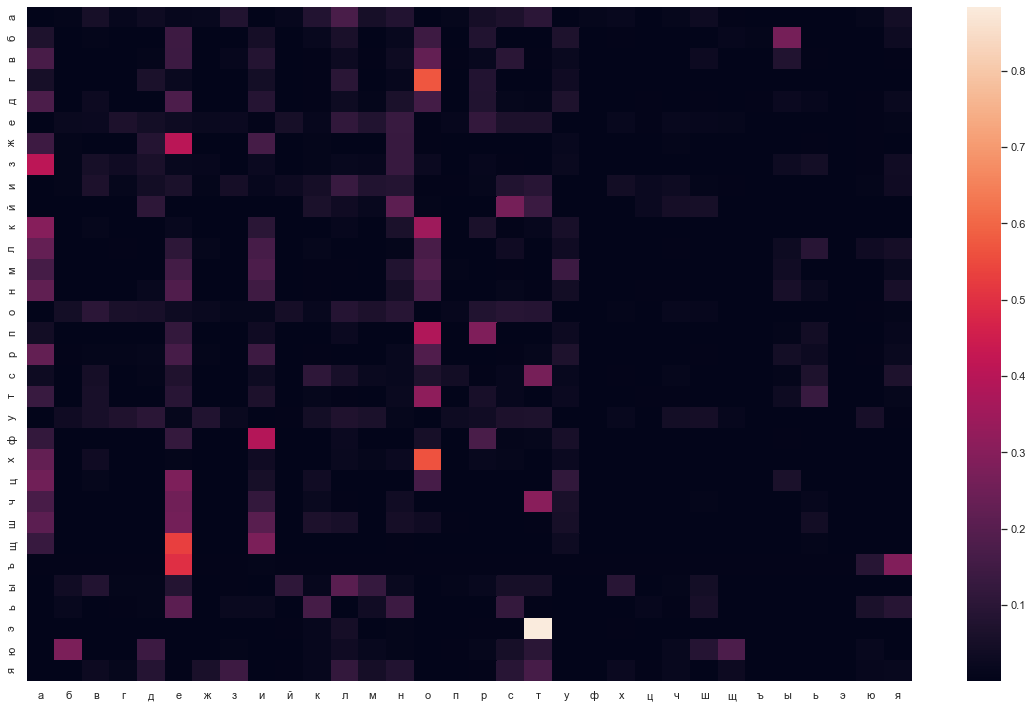

In [8]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'

POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

Очень большая вероятность, что в тексте после **'э'** будет идти **'т'**, потом идут **'х'** и **'о'**, и **'щ'** и **'е'**

**Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р**

In [9]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba

In [10]:
proba_sum

0.0011975370164643182

не очень большая вероятность в данном тексте

**Генерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов**

In [11]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

богомудня


 слово получилось так себе :)

**Оценка ряда через HMM. Пробуем строить (через среднее каждой компоненты) наивный прогноз ряда**

In [12]:
warnings.filterwarnings('ignore')

In [13]:
series = pd.read_csv('monthly-boston-armed-robberies-j.csv',sep=',').iloc[:,1]

In [14]:
values = series.values.reshape(-1,1)

In [15]:
X_train = values[:150]
X_test = values[150:]

In [16]:
for n in range(1, 30):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

1 -739.512376545524
2 -652.7824661820222
3 -629.4670322744704
4 -593.9630194813594
5 -577.8703292975327
6 -571.318224758384
7 -561.129721798887
8 -559.515362938161


Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.


9 -554.9655051223986


Fitting a model with 142 free scalar parameters with only 118 data points will result in a degenerate solution.


10 -548.5676105407321


Fitting a model with 167 free scalar parameters with only 118 data points will result in a degenerate solution.


11 -546.7928327026555


Fitting a model with 194 free scalar parameters with only 118 data points will result in a degenerate solution.


12 -543.9831054837938


Fitting a model with 223 free scalar parameters with only 118 data points will result in a degenerate solution.


13 -537.8561414556517


Fitting a model with 254 free scalar parameters with only 118 data points will result in a degenerate solution.


14 -530.8621639885368


Fitting a model with 287 free scalar parameters with only 118 data points will result in a degenerate solution.


15 -526.1043327321383


Fitting a model with 322 free scalar parameters with only 118 data points will result in a degenerate solution.


16 -520.7908442879743


Fitting a model with 359 free scalar parameters with only 118 data points will result in a degenerate solution.


17 -519.9518548929755


Fitting a model with 398 free scalar parameters with only 118 data points will result in a degenerate solution.


18 -505.6571599483322


Fitting a model with 439 free scalar parameters with only 118 data points will result in a degenerate solution.


19 -502.5419807696441


Fitting a model with 482 free scalar parameters with only 118 data points will result in a degenerate solution.


20 -505.18109317941037


Fitting a model with 527 free scalar parameters with only 118 data points will result in a degenerate solution.


21 -494.5829879743066


Fitting a model with 574 free scalar parameters with only 118 data points will result in a degenerate solution.


22 -495.6927390789574


Fitting a model with 623 free scalar parameters with only 118 data points will result in a degenerate solution.


23 -489.66516130228905


Fitting a model with 674 free scalar parameters with only 118 data points will result in a degenerate solution.


24 -482.78691143399607


Fitting a model with 727 free scalar parameters with only 118 data points will result in a degenerate solution.


25 -472.67785442742996


Fitting a model with 782 free scalar parameters with only 118 data points will result in a degenerate solution.


26 -473.2982095151988


Fitting a model with 839 free scalar parameters with only 118 data points will result in a degenerate solution.


27 -464.9972827632774


Fitting a model with 898 free scalar parameters with only 118 data points will result in a degenerate solution.


28 -458.39012291807
29 -435.4883861963681


In [17]:
model = GaussianHMM(n_components=24,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 623 free scalar parameters with only 118 data points will result in a degenerate solution.


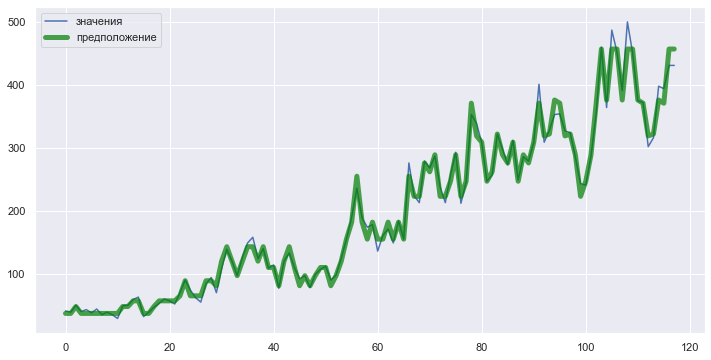

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(values,label='значения')
plt.plot(means, linewidth=5, alpha=0.7, color='green',label='предположение')
plt.legend()
plt.show()

Получается неплохое предсказание, но далекое от идеала.